## Classification demo including training

In [1]:
# !pip install pillow

In [2]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
## Initialising the CNN
classifier = Sequential()

In [4]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [5]:
## Flattening
classifier.add(Flatten())

In [6]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [7]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [10]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [11]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
## Importing training data
train_set = train_datagen.flow_from_directory('C:/Users/Subhadri/Desktop/Data Science - Term 2/Artificial Intelligence/Day 5 - Cat_Dog (Keras - CNN)/dataset/training_set',
                                               target_size = (64, 64),
                                               class_mode = 'binary')

Found 98 images belonging to 2 classes.


In [13]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [14]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'cats': 0, 'dogs': 1}


In [15]:
## Importng test data
test_set = test_datagen.flow_from_directory('C:/Users/Subhadri/Desktop/Data Science - Term 2/Artificial Intelligence/Day 5 - Cat_Dog (Keras - CNN)/dataset/test_set',
                                            target_size = (64, 64),
                                            class_mode = 'binary')

Found 38 images belonging to 2 classes.


In [16]:
## fitting model to images
classifier.fit_generator(train_set, epochs = 10, validation_data = test_set)


Epoch 1/10
4/4 [==============================] - 1s 248ms/step - loss: 0.7399 - accuracy: 0.4796 - val_loss: 0.6997 - val_accuracy: 0.5263
Epoch 2/10
4/4 [==============================] - 0s 121ms/step - loss: 0.6944 - accuracy: 0.5000 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 1s 129ms/step - loss: 0.6949 - accuracy: 0.4388 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 93ms/step - loss: 0.6970 - accuracy: 0.5306 - val_loss: 0.6986 - val_accuracy: 0.4737
Epoch 5/10
4/4 [==============================] - 1s 149ms/step - loss: 0.6906 - accuracy: 0.5000 - val_loss: 0.6519 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 1s 143ms/step - loss: 0.7054 - accuracy: 0.5000 - val_loss: 0.7175 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 1s 134ms/step - loss: 0.6745 - accuracy: 0.5000 - val_loss: 0.6555 - val_accuracy: 0.5000
Epoch 8/10
4/4 [====

## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_set,
        validation_steps=38)

In [17]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('C:/Users/Subhadri/Desktop/Data Science - Term 2/Artificial Intelligence/Day 5 - Cat_Dog (Keras - CNN)/dataset/single_prediction/cat.jpg'
                           ,target_size =(64,64))


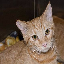

In [18]:
test_image

In [19]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [20]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [21]:
result = classifier.predict(test_image)

In [22]:
## Class label of dog and cat

if result == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

In [23]:
prediction

'dog'

### Save Mode

In [24]:
# serialize model to JSON
model_json = classifier.to_json()
with open('model1.json', 'w') as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
classifier.save_weights('model1.h5')
print('Saved model to disk')

Saved model to disk
